# Basic R

## Introduction

One cannot acquire a new programming language without investing numerous hours.
[R-Introduction](https://cran.r-project.org/doc/manuals/r-release/R-intro.pdf) is an official manual
maintained by the R core team.
It was the first document that I perused painstakingly when I began to learn R in 2005.
After so many years, this is still the best starting point for you to have a taste.

This lecture quickly sketches some key points of the manual, while you should carefully go over R-Introduction
after today's lecture.

## Help System

The help system is the first thing we must learn for a new language.
In R, if we know the exact name of a function and want to check its usage, we can either call `help(function_name)` or a single question mark `?function_name`.
If we do not know the exact function name, we can instead use the double question mark `??key_words`. It will provide a list of related function names from a fuzzy search.

**Example**: `?seq`, `??sequence`

## Vector

A *vector* is a collection of elements of the same type, say, integer, logical value, real number, complex number, characters or factor.
Unlike C, R does not require explicit type declaration.

 `<-` assigns the value on its right-hand side to a self-defined variable name on its left-hand side. `=` is an alternative for assignment, which I prefer.

 `c()`  combines two or more vectors into a long vector.


Binary arithmetic operations `+`, `-`, `*` and `\` are performed element by element.
So are the binary logical operations `&` `|` `!=`.

*Factor* is a categorical number. *Character* is text.

Missing values in R is represented as `NA` (Not Available). When some operations are not allowed, say, `log(-1)`, R returns  `NaN` (Not a Number).

Vector selection is specified in square bracket `a[ ]` by either positive integer or logical vector.

**Example**

Logical vector operation.

In [1]:
logi_1 = c(T,T,F)
logi_2 = c(F,T,T)

logi_12 = logi_1 & logi_2
print(logi_12)

[1] FALSE  TRUE FALSE


## Array and Matrix

An array is a table of numbers.  
A matrix is a 2-dimensional array.

* array arithmetic: element-by-element. Caution must be exercised in binary operations involving two objects of different length. This is error-prone.
* `%*%`, `solve`, `eigen`

**Example**

OLS estimation with one $x$ regressor and a constant.
Graduate textbook expresses the OLS in matrix form
$$\hat{\beta} = (X' X)^{-1} X'y.$$
To conduct OLS estimation in R, we literally translate the mathematical expression into code.

Step 1: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

Step 1: We need data $Y$ and $X$ to run OLS. We simulate an artificial dataset.

In [2]:
# simulate data
rm(list = ls( ) )
set.seed(111) # can be removed to allow the result to change

# set the parameters
n = 100
b0 = matrix(1, nrow = 2 )

# generate the data
e = rnorm(n)
X = cbind( 1, rnorm(n) )
Y = X %*% b0 + e

Step 2: translate the formula to code

In [3]:
bhat = solve( t(X) %*% X, t(X)%*% Y )

Step 3 (additional): plot the regression graph with the scatter points and the regression line.
Further compare the regression line (black) with the true coefficient line (red).

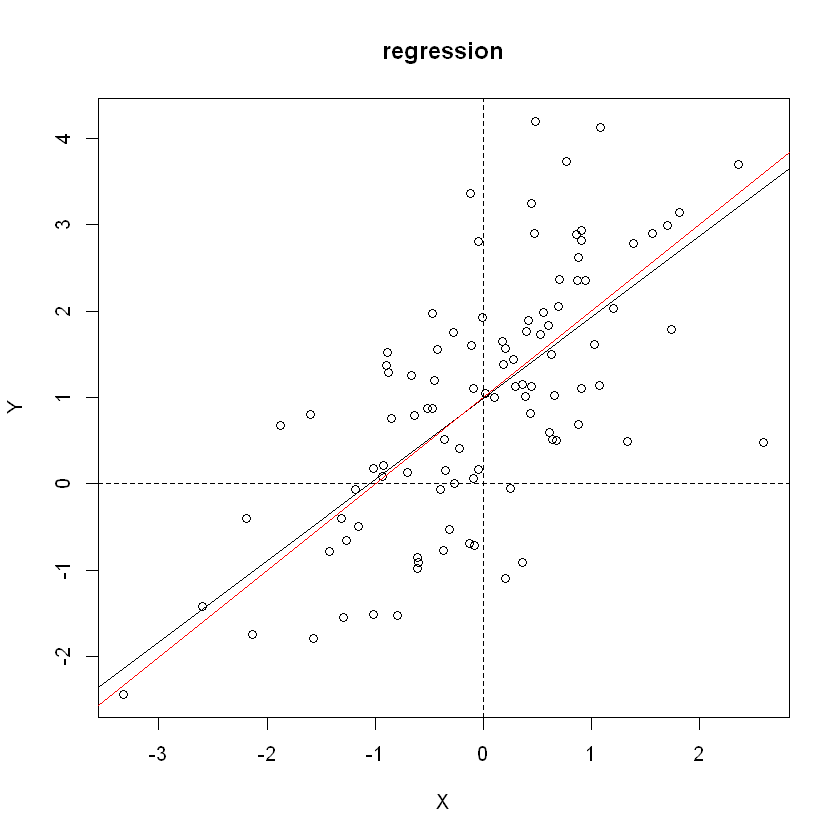

In [4]:
# plot
plot( y = Y, x = X[,2], xlab = "X", ylab = "Y", main = "regression")
abline( a= bhat[1], b = bhat[2])
abline( a = b0[1], b = b0[2], col = "red")
abline( h = 0, lty = 2)
abline( v = 0, lty = 2)

Step 4: In econometrics we are often interested in hypothesis testing.
The *t*-statistic is widely used.
To test the null $H_0: \beta_2 = 1$, we compute the associated *t*-statistic.
Again, this is a translation.
$$
t  =  \frac{\hat{\beta}_2 - \beta_{02}}{ \hat{\sigma}_{\hat{\beta}_2}  }
   =  \frac{\hat{\beta}_2 - \beta_{02}}{ \sqrt{ \left[ (X'X)^{-1} \hat{\sigma}^2 \right]_{22} } }.
$$
where $[\cdot]_{22}$ is the (2,2)-element of a matrix.

In [5]:
bhat2 = bhat[2] # the parameter we want to test
e_hat = Y - X %*% bhat
sigma_hat_square = sum(e_hat^2)/ (n-2)
Sigma_B = solve( t(X) %*% X  ) * sigma_hat_square
t_value_2 = ( bhat2 - b0[2]) / sqrt( Sigma_B[2,2] )
print(t_value_2)

[1] -0.5615293


## Package

A pure clean installation of R is small, but R has an extensive ecosystem of add-on packages.
This is the unique treasure for R users, and other languages like Python or MATLAB are not even close.
Most packages are hosted on [CRAN](https://cran.r-project.org/web/packages/).
A common practice today is that statisticians upload a package to CRAN after they write or publish a paper with a new statistical method.
They promote their work via CRAN, and users have easy access to the state-of-the-art methods.

A package can be installed by
`install.packages("package_name")` and invoked by `library(package_name)`.

[Applied Econometrics with R](http://www.springer.com/gp/book/9780387773162) by Christian Kleiber and Achim Zeileis is a useful book.
It also has a companion package
`AER` that contains popular econometric methods such as instrumental variable regression and robust variance.

## Mixed Data Types

A vector only contains one type of elements.
*list* is a basket for objects of various types.
It can serve as a container when a procedure returns more than one useful object.
For example, when we invoke `eigen`, we are
interested in both eigenvalues and eigenvectors,
which are stored into `$value` and `$vector`, respectively.

*data.frame* is a two-dimensional table that stores the data, similar to a spreadsheet in Excel.
A matrix is also a two-dimensional table, but it only accommodates one type of elements.
Real world data can be a collection of integers, real numbers, characters, categorical numbers and so on.
Data frame is the best way to organize data of mixed type in R.

**Example**

This is a data set in a graduate-level econometrics textbook. We load the data into memory and display the first 6 records.

In [6]:
library(AER)
data("CreditCard")
head(CreditCard)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival



card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
yes,0,37.66667,4.5200,0.033269910,124.983300,yes,no,3,54,1,12
yes,0,33.25000,2.4200,0.005216942,9.854167,no,no,3,34,1,13
yes,0,33.66667,4.5000,0.004155556,15.000000,yes,no,4,58,1,5
yes,0,30.50000,2.5400,0.065213780,137.869200,no,no,0,25,1,7
yes,0,32.16667,9.7867,0.067050590,546.503300,yes,no,2,64,1,5
yes,0,23.25000,2.5000,0.044438400,91.996670,no,no,0,54,1,1



## Input and Output

Raw data is often saved in ASCII file or Excel.
I discourage the use of Excel spreadsheet in data analysis, because the underlying structure of an
Excel file is too complicated for statistical software to read.
I recommend the use of `csv` format, a plain ASCII file format.

`read.table()` or `read.csv()` imports data from an ASCII file into an R session.
`write.table()` or `write.csv()` exports the data in an R session to an ASCII file.

**Example**

Besides loading a data file on the local hard disk, We can directly download data from internet.
Here we show how to retrieve the stock daily data of *Apple Inc.* from *Yahoo Finance*, and save the dataset locally. A package called `quantmod` is used.

In [7]:
library(quantmod)
getSymbols("AAPL", from = "2017-01-01", to = Sys.Date(), src = "yahoo")
print( head(AAPL) )
write.csv(AAPL, file = "AAPL.csv")

Loading required package: xts

Loading required package: TTR

Version 0.4-0 included new data defaults. See ?getSymbols.

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.




[1] "AAPL"

           AAPL.Open AAPL.High AAPL.Low AAPL.Close AAPL.Volume AAPL.Adjusted
2017-01-03    115.80    116.33   114.76     116.15    28781900      110.6912
2017-01-04    115.85    116.51   115.75     116.02    21118100      110.5673
2017-01-05    115.92    116.86   115.81     116.61    22193600      111.1296
2017-01-06    116.78    118.16   116.47     117.91    31751900      112.3685
2017-01-09    117.95    119.43   117.94     118.99    33561900      113.3977
2017-01-10    118.77    119.38   118.30     119.11    24462100      113.5121


**Example**: Get Federal Reserve data [http://research.stlouisfed.org/fred2/](http://research.stlouisfed.org/fred2/). For example, the following code in one line download the 10-Year Treasury Constant Maturity Rate (DGS10) and Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL).

[1] "CPIAUCSL" "DGS10"

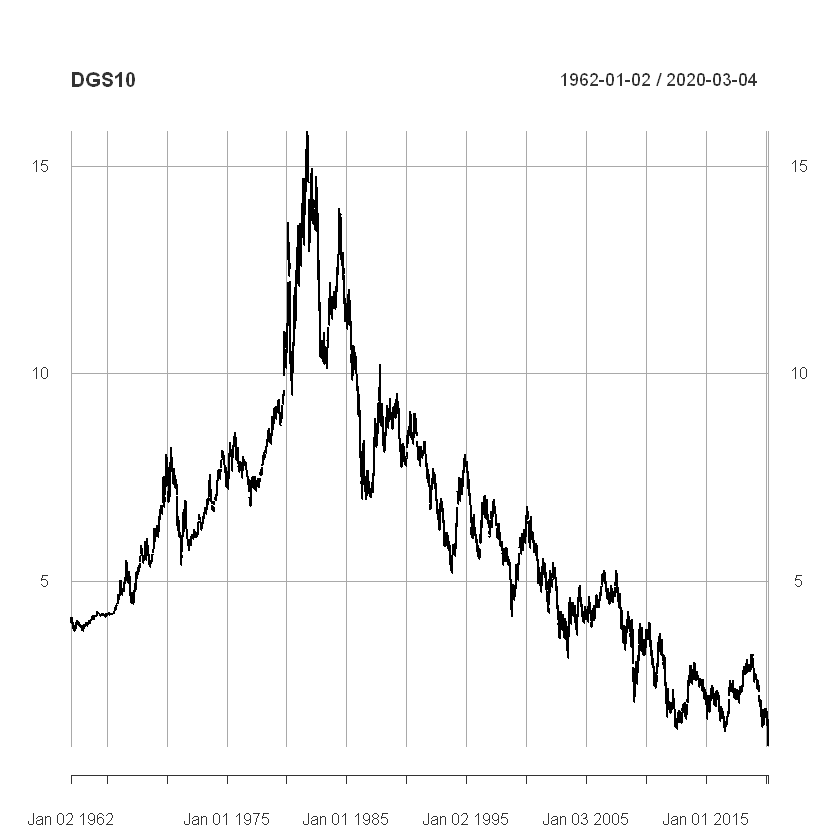

In [8]:
library(quantmod)
getSymbols(Symbols = c("CPIAUCSL", "DGS10"), env = .GlobalEnv, src="FRED" ) 
# the line above will generate to objects "CPIAUCSL" and "DGS10"
plot(DGS10)


## Statistics

R is a language created by statisticians.
It has elegant built-in statistical functions.
`p` (probability), `d` (density for a continuous random variable, or mass for a discrete random variable), `q` (quantile), `r` (random variable generator) are used ahead of the name of a probability distribution, such as `norm` (normal), `chisq` ($\chi^2$), `t` (*t*),
`weibull` (Weibull), `cauchy` (Cauchy), `binomial` (binomial), `pois` (Poisson), to name a few.

**Example**

This example illustrates the sampling error.

1. Plot the density of $\chi^2(3)$ over an equally spaced grid system `x_axis = seq(0.01, 15, by = 0.01)` (black line).
2. Generate 1000 observations from $\chi^2(3)$ distribution. Plot the kernel density, a nonparametric estimation of the density (red line).
3. Calculate the 95-th quantile and the empirical probability of observing a value greater than the 95-th quantile.
In population, this value should be 5%. What is the number in this experiment?


[1] 0.039

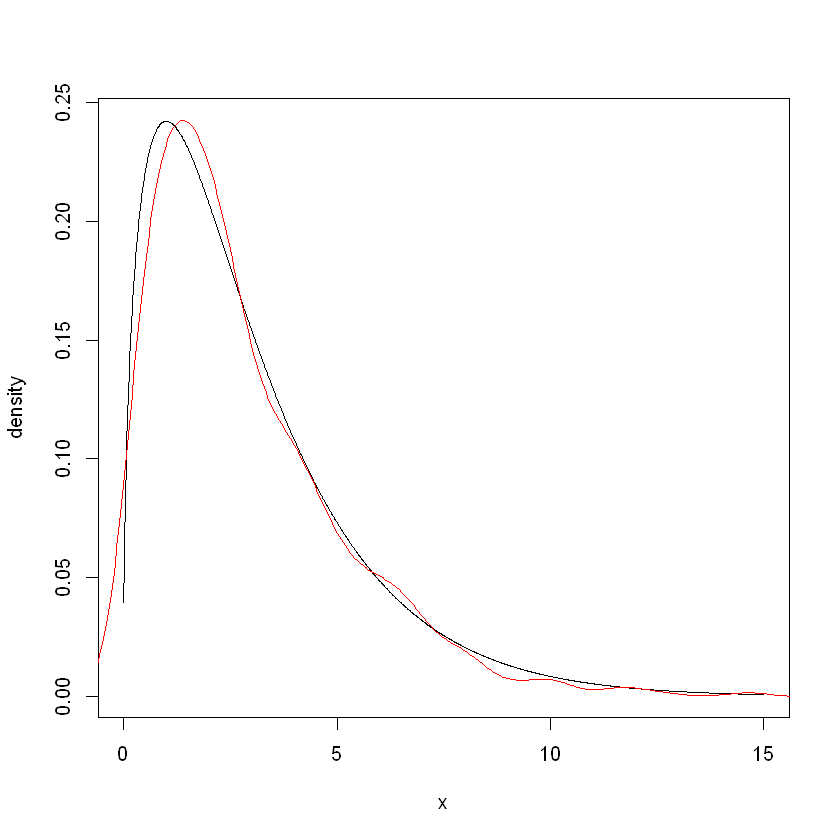

In [9]:
x_axis = seq(0.01, 15, by = 0.01)

y = dchisq(x_axis, df = 3)
plot(y = y, x=x_axis, type = "l", xlab = "x", ylab = "density")
z = rchisq(1000, df = 3)
lines( density(z), col = "red")
crit = qchisq(.95, df = 3)

mean( z > crit )



## User-defined Function

R has numerous built-in functions. However, in practice we will almost always have some  
DIY functionality to be used repeatedly. It is highly recommended to encapsulate it into a user-defined function.
There are important advantages:

1. In the developing stage, it allows us to focus on a small chunk of code. It cuts an overwhelmingly big project into manageable pieces.
2. A long script can have hundreds or thousands of variables. Variables defined inside a function are local. They will not be mixed up with those outside of a function. Only the input and the output of a function have interaction with the outside world.
3. If a revision is necessary, We just need to change one place. We don't have to repeat the work in every place where it is invoked.

The format of a user-defined function in R is

```
function_name = function(input) {
  expressions
  return(output)
}
```

**Example**

If the central limit theorem is applicable, then
we can calculate the 95% two-sided asymptotic confidence interval as
$$\left(\hat{\mu} - \frac{1.96}{\sqrt{n}} \hat{\sigma}, \hat{\mu} + \frac{1.96}{\sqrt{n}} \hat{\sigma} \right)$$
from a given sample.
It is an easy job, but I am not aware there is a built-in function in R to do this.


In [10]:
CI = function(x){
  # x is a vector of random variables

  n = length(x)
  mu = mean(x)
  sig = sd(x)
  upper = mu + 1.96/sqrt(n) * sig
  lower = mu - 1.96/sqrt(n) * sig
  return( list( lower = lower, upper = upper) )
}

## Flow Control

Flow control is common in all programming languages.
`if` is used for choice, and `for` or `while` is used for loops.

**Example**

Calculate the empirical coverage probability of a Poisson distribution of degrees of freedom 2.
We conduct this experiment for 1000 times.

In [11]:
Rep = 1000
sample_size = 100
capture = rep(0, Rep)


pts0 = Sys.time() # check time
for (i in 1:Rep){
  mu = 2
  x = rpois(sample_size, mu)
  bounds = CI(x)
  capture[i] = ( ( bounds$lower <= mu  ) & (mu <= bounds$upper) )
}
mean(capture) # empirical size
pts1 = Sys.time() - pts0 # check time elapse
print(pts1)

[1] 0.944

Time difference of 0.1785362 secs



## Statistical Model

Statistical models are formulated as `y~x`, where `y` on the left-hand side is the dependent variable,
and `x` on the right-hand side is the explanatory variable.
The built-in OLS function is `lm`. It is called by `lm(y~x, data = data_frame)`.

All built-in regression functions in R share the same structure. Once one type of regression is understood,
it is easy to extend to other regressions.

### A Linear Regression Example

This is a toy example with simulated data.

In [12]:
T = 100
p = 1

b0 = 1
# Generate data
x = matrix( rnorm(T*p), T, 1)
y = x %*% b0 + rnorm(T)

# Linear Model
result = lm(y ~ x)
summary(result)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.12256 -0.68830  0.03699  0.61869  2.08061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.01574    0.08741   -0.18    0.857    
x            1.06261    0.07748   13.71   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.874 on 98 degrees of freedom
Multiple R-squared:  0.6574,	Adjusted R-squared:  0.6539 
F-statistic: 188.1 on 1 and 98 DF,  p-value: < 2.2e-16



The `result` object is a list containing the regression results. As shown in the results, we can easily read the estimated coefficients, t-test results, F-test results, and the R-sqaure.

We can plot the true value of $y$ and fitted value to examine whether the regression model fit the data well.

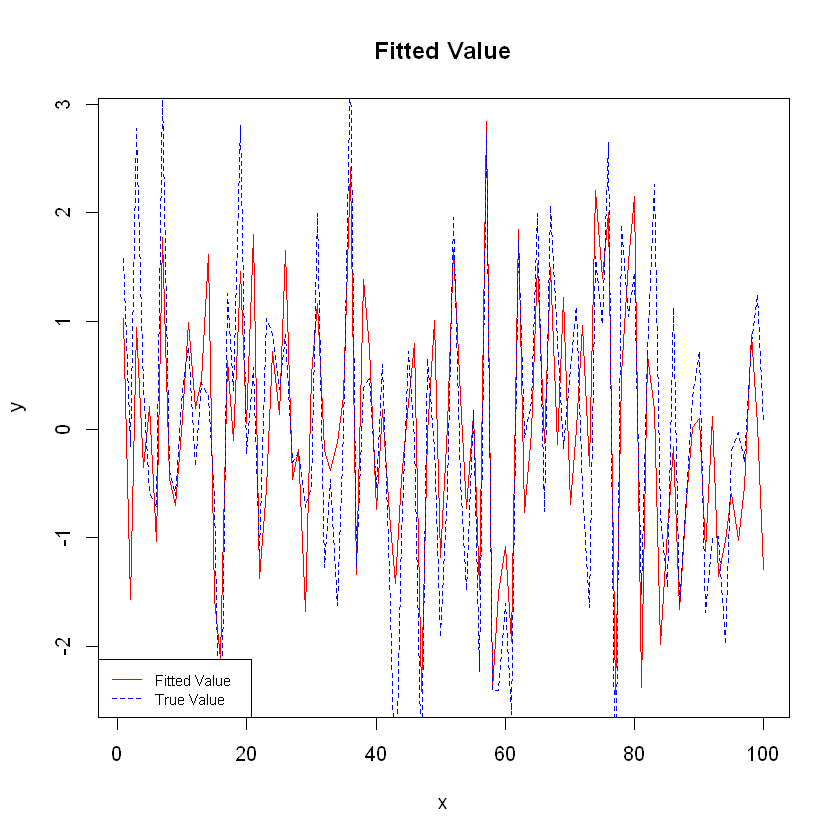

In [13]:
plot(result$fitted.values, col = 'red', type = 'l', xlab = 'x', ylab = 'y',
     main = 'Fitted Value')
lines(y, col = 'blue', type = 'l', lty = 2)
legend('bottomleft', legend=c("Fitted Value", "True Value"),
       col=c("red", "blue"), lty=1:2, cex = 0.75)

Then we plot the best fitted line.

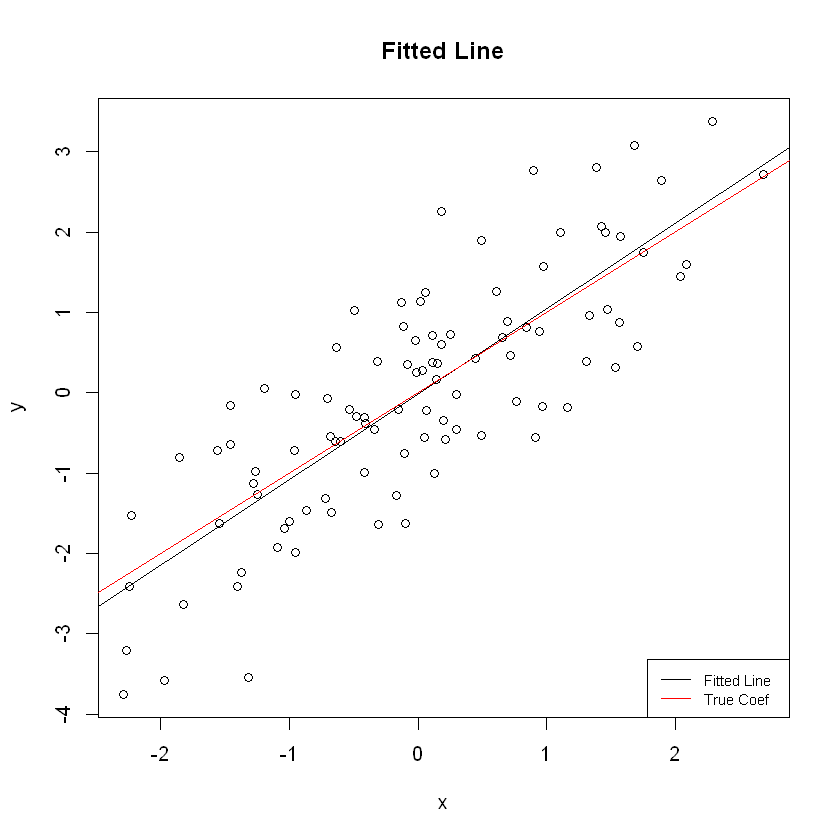

In [14]:
plot( y = y, x = x, xlab = "x", ylab = "y", main = "Fitted Line")
abline( a= result$coefficients[1], b = result$coefficients[2])
abline( a = 0, b = b0, col = "red")

legend('bottomright', legend=c("Fitted Line", "True Coef"),
       col=c("black", "red"), lty=c(1,1), cex = 0.75)

Here we give another example about the relationship between the height and weight of women.
The women dataset is from the package `datasets`, which is a bulit-in package shipped with R installation. 
This package contains a variety of datasets. For a complete list, use `library(help = "datasets")`


In [15]:
reg1 = lm(height~weight, data=women)

# multivariate 
reg2 = lm(height~weight+I(weight^2),data=women)
# "weight^2" is a square term.
# "I()" is used to inhibit the formula operator "+" from being interpreted as an arithmetical one.

summary(reg1)
summary(reg2)


Call:
lm(formula = height ~ weight, data = women)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.83233 -0.26249  0.08314  0.34353  0.49790 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.723456   1.043746   24.64 2.68e-12 ***
weight       0.287249   0.007588   37.85 1.09e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.44 on 13 degrees of freedom
Multiple R-squared:  0.991,	Adjusted R-squared:  0.9903 
F-statistic:  1433 on 1 and 13 DF,  p-value: 1.091e-14



Call:
lm(formula = height ~ weight + I(weight^2), data = women)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.105338 -0.035764 -0.004898  0.049430  0.141593 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.175e+01  1.720e+00   -6.83 1.82e-05 ***
weight       8.343e-01  2.502e-02   33.35 3.36e-13 ***
I(weight^2) -1.973e-03  9.014e-05  -21.89 4.84e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07158 on 12 degrees of freedom
Multiple R-squared:  0.9998,	Adjusted R-squared:  0.9997 
F-statistic: 2.732e+04 on 2 and 12 DF,  p-value: < 2.2e-16
